# 뉴스내용 크롤링분석

### 검색어 입력 과정 (수집된 데이터가 존재한다면 아래셀 한개만 실행시키고 바로 불러오기 부분으로 가면된다)
#### 끝내면 나오는 파일(뉴스 내용 데이터 프레임.csv, 빈도분석그래프{오류때문에 그림 안보임}.png,워드클라우드.png,연관분석결과표.csv)

In [5]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
path1= './data/'
path2= './산출물/'
### 조사할 단어 키워드
keyword='이혼 자녀'

#### 크롬드라이버 실행

In [6]:
driver=webdriver.Chrome('C:/chromedriver')
driver.get('https://www.bigkinds.or.kr/')
# driver.find_element_by_xpath('//*[@id="contents"]/div[3]/div/div[2]/div/div[2]/button').click()
driver.implicitly_wait(3)
title_data = []
sub_data = []
con_data = []

#### 기간 설정과정

In [3]:
driver.find_element_by_id('date-filter-btn').click()
begin_d = driver.find_element_by_id('search-begin-date')
begin_d.send_keys(Keys.HOME)
begin_d.send_keys('2015-01-01')
begin_d.send_keys(Keys.TAB)
end_d = driver.find_element_by_id('search-end-date')
end_d.send_keys(Keys.HOME)
end_d.send_keys('2015-12-31')
begin_d.send_keys(Keys.TAB)
driver.find_element_by_id('date-filter-btn').click()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=78.0.3904.108)


#### 검색어입력

In [ ]:
search = driver.find_element_by_id('total-search-key')
search.send_keys(keyword)
search.send_keys(Keys.RETURN)

#### 100건씩 보기 설정(한번씩 같은 페이지 2번 크롤링할때가 있다. 때문에 100이 빠르긴 하지만 똑같은 페이지 100개를 수집할 위험성존재)

In [ ]:
# #100건씩 보기
# driver.find_element_by_xpath('//*[@id="collapse-step-2"]/div/div/div[2]/div[2]/div/div[2]/div[2]/select').click()
# driver.find_element_by_xpath('//*[@id="collapse-step-2"]/div/div/div[2]/div[2]/div/div[2]/div[2]/select/option[4]').click()
# time.sleep(1)

#### 내용 크롤링하는 코드

In [ ]:
def crawl_nextpage(i=3):
    while True:
        address = '//*[@id="news-results-pagination"]/ul/li[' + f'{i}' + ']/a'
        i += 1
        try:
            data= driver.find_elements_by_css_selector('div.news-item__body > h4 ')            
            for r in data:
                time.sleep(1) 
                #창열기
                r.click()
                #제목 및 부속
#               a = driver.find_elements_by_css_selector('h4.modal-title')
#               title_data.append(a[7].text)
#               time.sleep(0.5)
#               b = driver.find_element_by_css_selector('div.pull-left')
#               sub_data.append(b.text)
                time.sleep(0.7)
#               내용 크롤링하는 과정
                con_data.append(driver.find_element_by_css_selector('div.news-detail__content').text)   
                #창닫기
                time.sleep(1) 
                driver.find_element_by_xpath('//*[@id="news-detail-modal"]/div/div/div[1]/button').click()
            time.sleep(2) 
            driver.find_element_by_xpath(address).click()
            print('o')
            time.sleep(4.1)
        except NoSuchElementException:
            break;

#### 실행코드(여기까지만 일단 먼저 실행시키는것 권장, 쉽게 죽기 때문에 컴퓨터 건들지 않는것 권장)

In [ ]:
while True:
    #페이지갯수
    lst = driver.find_elements_by_css_selector('#news-results-pagination > ul > li')
    len(lst)
    print(len(lst)-3)
    if len(lst)==10:
        crawl_nextpage()
        i=3
        
    else:
        crawl_nextpage()
        break;

#### 크롤링한 뉴스 갯수 세는 것(중복된 뉴스 빼기전 갯수기에 실제는 이보다 더 작다)

In [ ]:
len(con_data)

#### 내용저장하는 과정

In [ ]:
pd.DataFrame(con_data).to_csv(path1 + f'{keyword}_내용.csv',encoding='utf-8',index=False)

## 크롤링 이후 데이터 정제과정

#### 저장내용 다시 불러오는 과정

In [7]:
a = pd.read_csv(path1 + f'{keyword}_내용.csv',encoding='utf-8')

FileNotFoundError: [Errno 2] File b'./data/\xec\x9d\xb4\xed\x98\xbc \xec\x9e\x90\xeb\x85\x80_\xeb\x82\xb4\xec\x9a\xa9.csv' does not exist: b'./data/\xec\x9d\xb4\xed\x98\xbc \xec\x9e\x90\xeb\x85\x80_\xeb\x82\xb4\xec\x9a\xa9.csv'

In [8]:
a['0'].tolist()

NameError: name 'a' is not defined

In [9]:
len(a['0'].tolist())

NameError: name 'a' is not defined

#### 중복 수집된 기사 제거작업

In [ ]:
se_lst=set(a['0'].tolist())

In [ ]:
len(se_lst)

In [ ]:
nse_lst = []
for i in se_lst:
    nse_lst.append(i)

#### 최종 수집된 뉴스기사 갯수

In [ ]:
len(nse_lst)

#### 불용어처리과정(검색어 별로 저장하고 돌리고 해도 됨)

In [ ]:
### 공단 교통사고 검색했을 떄(972개 뉴스 수집) ---  문제점
# stop_words_lst = set(['앵커','검사','경우','지난해', '기자','도로교통공단','교통문화지수','국토교통부','교통안전공단','소방안전본부',
#                      '창원시의회','국민체육진흥공단','충남도로교통연수원','교수','교통문화지수','교통사고','사고','발생','안전','교통','공단','운전자'])

# import re
# for i in range(len(nse_lst)):
#     for w in stop_words_lst:
#         nse_lst[i]= re.sub(w, '', nse_lst[i])

In [ ]:
### 음주사고 검색했을 떄(972개 뉴스 수집) ---  문제점
# stop_words_lst = set(['앵커','검사','경우','지난해', '기자','도로교통공단','교통문화지수','국토교통부','교통안전공단','소방안전본부',
#                      '창원시의회','국민체육진흥공단','충남도로교통연수원','교수','교통문화지수','교통사고','사고','발생','안전','교통','공단','운전자',
#                      '음주운전','경찰','음주','운전','차량','단속','혐의','도로','상태','사람','조사','농도','당시','승용차','때문','알코올','시간',
#                      '사실','자신','측정','처벌','현장','결과','활동','행위','관계자','장윤정','연휴','자동차','수석','위험','예방','사건','이상','최근',
#                      '확인','필요','기간','올해','해당','시민'])

# import re
# for i in range(len(nse_lst)):
#     for w in stop_words_lst:
#         nse_lst[i]= re.sub(w, '', nse_lst[i])

#### 위에 있는 숫자와 다르면 안됨

In [ ]:
len(nse_lst)

In [ ]:
nse_lst

#### 문단별로 쪼개주는 과정(한 기사 내용전체로 하게되면 연관분석에서 부하걸리기 때문에)

In [ ]:
spl_lst = []
for i in nse_lst:
    for a in i.split('\n\n'):
        spl_lst.append(a)

In [ ]:
len(spl_lst)

#### 특수문자&중복 제거과정(여기서 중복은 '중복'이라는 단어를 제거하는 과정임, 예외도 마찬가지)

In [ ]:
import re
news_lst=[]
for i in spl_lst:
    i = re.sub('[^0-9a-zA-Zㄱ-힗]', ' ', i) #e.sub() 함수는 문자열에서 매치된 텍스트를 다른 텍스트로 치환할 때 사용
    news_lst.append(i)
# news_lst

In [ ]:
len(news_lst)

In [ ]:
n_lst = []
for news in news_lst:
    if ('중복' not in news) and ('예외' not in news):
        n_lst.append(news)

In [ ]:
len(n_lst)

#### 요소중에 공백이 존재하면 형태소 분석이 안되기 때문에 공백 제거해주는 과정

In [ ]:
### 공백있으면 코모란 안돌아가서 공백 제거해주는 과정
nn_lst = []
for i in n_lst:
    if i =='':
        pass
    else:
        nn_lst.append(i)

In [ ]:
len(nn_lst)

#### 일정길이 이하 문단은 버려버리기(ex ~~기자(이메일),~~뉴스 와 같은 필요없는 짧은 문장들) /취사선택사항임

In [ ]:
nnn_lst = []
for i in nn_lst:
    if len(i)<=50:
        pass
    else:
        nnn_lst.append(i)

In [ ]:
len(nnn_lst)

## 빈도그래프, 워드클라우드,연관분석 단계

In [ ]:
import pandas as pd
import nltk
from konlpy.tag import Komoran
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
komoran = Komoran()
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

#### 트랜잭션 만들어주는 과정

In [26]:
noun_lst = []
tran = []
for n in nnn_lst:
    noun_lst = komoran.nouns(n)
    tran.append(noun_lst)

#### 한글자 이하인 단어들 없애주는 과정

In [27]:
fin_lst=[]
for n in tran:
    two_lst = []
    for i in n:
        if len(i)<=1:
            pass
        else:
            two_lst.append(i)
    fin_lst.append(two_lst)

#### 명사 빈도분석그래프

In [28]:
nouns = []
for i in fin_lst:
    for n in i:
        nouns.append(n)        

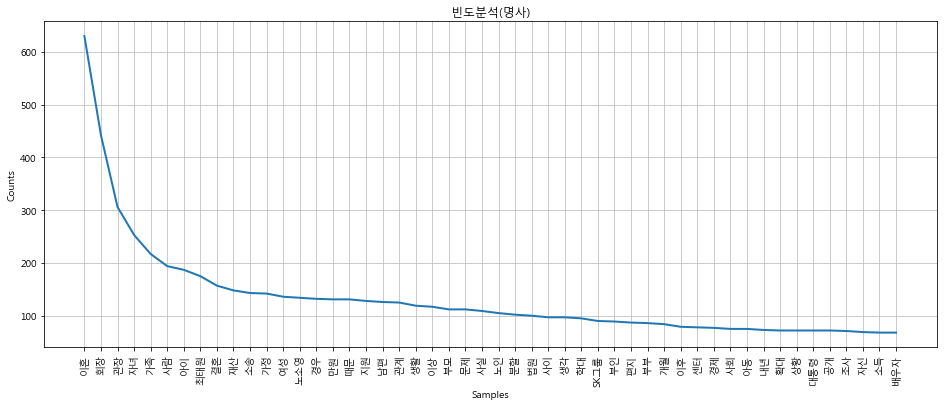

In [29]:
tokens = nouns
vocab = nltk.Text(tokens)
plt.figure(figsize=(16,6))
plt.title('빈도분석(명사)')
vocab.plot(50)
plt.show()
# plt.savefig(path2 + f'{keyword}빈도분석(명사).png',transparent=True, dpi=100)

### 워드클라우드(명사)

In [30]:
불용어 = set(['경우', '추석','때문','사람','질환','발생','광주 북구','낚시 어선',
          '불어 하우','이상','증가','지방간','원인','무료','상담','분석 결과'])

In [31]:
text_noun = ' '.join(nouns)

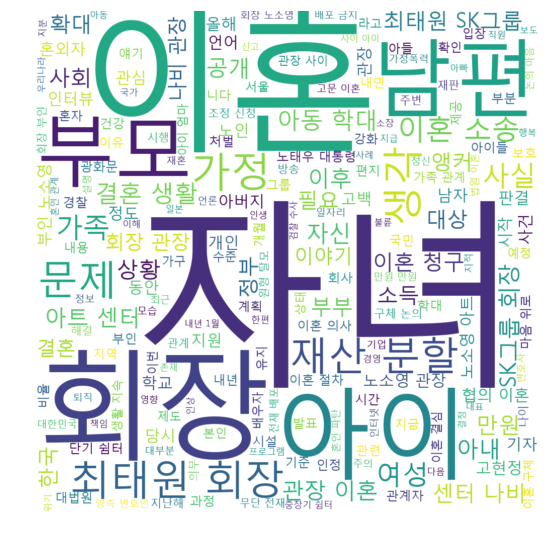

In [32]:
wordc = WordCloud( 
    width = 1000,
    height = 1000,background_color='white',
    font_path='C:/Windows/Fonts/malgun.ttf', 
    relative_scaling=0.5, stopwords=불용어)
wordc.generate(text_noun)
plt.figure(figsize=(9,16))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig(path2 + f'{keyword}워드클라우드(명사).png',transparent=False)

### 연관분석 단계

In [33]:
from apyori import apriori
rules = apriori(fin_lst, min_support=0.1, min_confidence=0.1)
#지지도가 너무 작으면 연관분석에 많은 시간이 소요된다.
results= list(rules)

In [34]:
result_df = pd.DataFrame(None, columns=['lhs','rhs','support','confidence','lift'])
index=0
for result in results:
    support = result[1]
    ordered_statistic = result[2]
    for item in ordered_statistic:
        lhs = ' '.join(x.strip() for x in item[0])
        rhs = ' '.join(x.strip() for x in item[1])
        confidence = item[2]
        lift = item[3]
        result_df.loc[index] = [lhs, rhs, support, confidence, lift]
        index +=1

In [35]:
result_df

,lhs,rhs,support,confidence,lift
0,,가정,0.107471,0.107471,1.000000
1,,가족,0.124509,0.124509,1.000000
2,,결혼,0.121887,0.121887,1.000000
3,,경우,0.106160,0.106160,1.000000
4,,관계,0.114024,0.114024,1.000000
5,,관장,0.166448,0.166448,1.000000
6,,노소영,0.114024,0.114024,1.000000
7,,때문,0.119266,0.119266,1.000000
8,,사람,0.162516,0.162516,1.000000
9,,생활,0.115334,0.115334,1.000000


### 연관분석 결과저장

In [36]:
pd.DataFrame(result_df).to_csv(path2 + f'{keyword}_신뢰지지.csv',encoding='cp949',index=False)

### 결과물로 DATA에 크롤링데이터 하나, 산출물에 그래프, 워드클라우드, 연관분석결과 저장되어야함